## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [2]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [3]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [4]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [6]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [7]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [8]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [10]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [11]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [12]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [13]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
condition_1 = (df['is_valid'] == 1)
condition_2 = (df['category'] == 'Mobiles & Tablets')
condition_3 = ((df['order_date']>= '2022-01-01') & (df['order_date'] <= '2022-12-31'))

top_5_mnt = df[condition_1 & condition_2  & condition_3]
top_5_mnt = pd.DataFrame(top_5_mnt.sort_values(by = ['qty_ordered'])["sku_name"].head())
top_5_mnt = top_5_mnt.rename(columns={"sku_name": "Top 5 Product of Mobiles & Tablets"})
top_5_mnt

,Top 5 Product of Mobiles & Tablets
20,Samsung_Galaxy_S8_Plus_Black
877,huawei_Google Nexus 6P-Silver
832,iPhone7-Matte Black -32GB
788,samsung_G935F-Black
762,Samsung_Galaxy_S8_black


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [14]:
def isIncreased(row):
  if row['Qty. Ordered on 2022'] > row['Qty. Ordered on 2021']:
    return 'Increased'
  elif row['Qty. Ordered on 2022'] == row['Qty. Ordered on 2021']:
    return 'No difference'
  else:
    return 'Decreased'

In [15]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
condition_1 = ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))
condition_2 = ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
condition_3 = (df['is_valid'] == 1)

df_categorized_2021 = df[condition_1 & condition_3]
df_categorized_2022 = df[condition_2 & condition_3]

df_categorized_2021 = df_categorized_2021.groupby(by = ['category'], as_index = False)['qty_ordered'].sum()
df_categorized_2022 = df_categorized_2022.groupby(by = ['category'], as_index = False)['qty_ordered'].sum()

df_merge = df_categorized_2021.merge(df_categorized_2022, how = 'inner', on = ['category'])
df_merge = df_merge.rename(columns={"qty_ordered_x": "Qty. Ordered on 2021", "qty_ordered_y": "Qty. Ordered on 2022"})
df_merge['Qty. Ordered'] = df_merge.apply(isIncreased, axis = 1)
df_merge

,category,Qty. Ordered on 2021,Qty. Ordered on 2022,Qty. Ordered
0,Appliances,124,148,Increased
1,Beauty & Grooming,168,153,Decreased
2,Books,171,195,Increased
3,Computing,109,153,Increased
4,Entertainment,77,150,Increased
5,Health & Sports,173,200,Increased
6,Home & Living,193,250,Increased
7,Kids & Baby,170,227,Increased
8,Men Fashion,237,175,Decreased
9,Mobiles & Tablets,107,1154,Increased


## `Jawaban No 2.2`

In [16]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
condition_1 = ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))
condition_2 = ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
condition_3 = (df['category'] == 'Others')
condition_4 = (df['is_valid'] == 1)

df_2021 = df[condition_1 & condition_3 & condition_4]
df_2022 = df[condition_2 & condition_3 & condition_4]

df_2021 = df_2021.groupby(by = ['sku_name'], as_index = False)['qty_ordered'].sum()
df_2022 = df_2022.groupby(by = ['sku_name'], as_index = False)['qty_ordered'].sum()

df_merge = df_2021.merge(df_2022, how = 'inner', on = ['sku_name'])
df_merge['Decreased Sales'] = df_merge['qty_ordered_x'] - df_merge['qty_ordered_y']
df_merge = df_merge.sort_values(by = ['Decreased Sales'], ascending = False)
df_merge = df_merge.rename(columns = {'sku_name':'Products', 'qty_ordered_x':'Qty. Ordered on 2021', 'qty_ordered_y':'Qty. Ordered on 2022'})
df_merge

,Products,Qty. Ordered on 2021,Qty. Ordered on 2022,Decreased Sales
7,RB_Dettol Germ Busting Kit-bf,200,45,155
8,Telemall_MM-DR-HB-L,23,2,21
16,kansai_NeverWet,10,1,9
14,emart_00-1,7,1,6
5,MEGUIAR_G12711,4,1,3
0,Aladdin_bike_cover,3,2,1
11,aw_Ultra Shine Wash & Wax-64oz./1893ml,2,1,1
9,Tmall_MM-DR-PAD,2,1,1
2,Entertainer Asia_Vouch 365-2017 Mobile App Lahore,2,1,1
4,MEGUIAR_A1214,1,1,0


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [17]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
condition_1 = (df['is_gross'] == 1)
condition_2 = (df['is_valid'] == 0)
condition_3 = ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))

df_is_gross = df[condition_1 & condition_2 & condition_3][['customer_id','registered_date']]
df_is_gross

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13
5881,C265450L,2022-02-17


In [18]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
df_is_gross.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

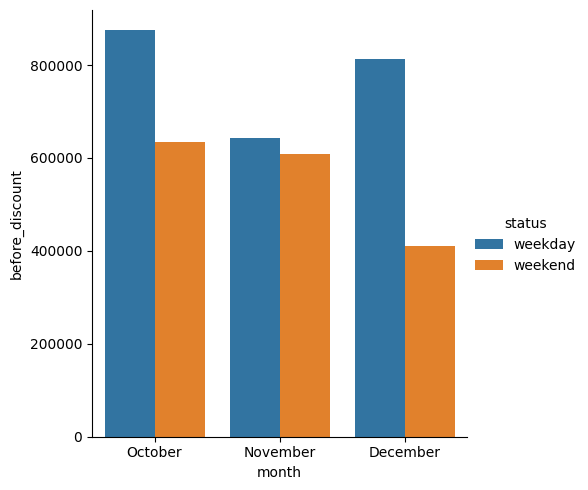

In [24]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
condition_1 = ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))
condition_2 = (df['is_valid'] == 1)

df_mean_of_sales = df[condition_1 & condition_2].copy()
df_mean_of_sales['day'] = df_mean_of_sales['order_date'].dt.day_name()
df_mean_of_sales['month'] = df_mean_of_sales['order_date'].dt.month_name()

df_weekday = df_mean_of_sales[df_mean_of_sales['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].copy()
df_weekend = df_mean_of_sales[df_mean_of_sales['day'].isin(['Saturday', 'Sunday'])].copy()

df_weekday['status'] = 'weekday'
df_weekend['status'] = 'weekend'

df_weekday = df_weekday.groupby(['month', 'status'], as_index=False)["before_discount"].mean(numeric_only=True).sort_values(by=['month'], ascending=False)
df_weekend = df_weekend.groupby(['month', 'status'], as_index=False)["before_discount"].mean(numeric_only=True).sort_values(by=['month'], ascending=False)

df_merge = pd.concat([df_weekday, df_weekend], axis=0)

sns.catplot(data=df_merge,kind='bar',x='month',y='before_discount',hue='status')

## `Jawaban No 4.2`

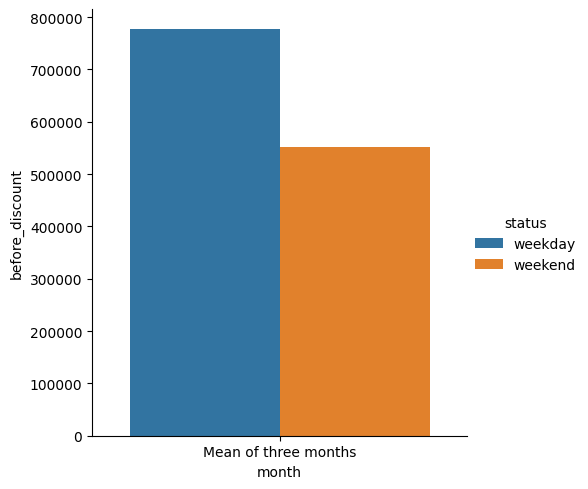

In [20]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df_3_months = df_merge.groupby(['status'], as_index=False).mean(numeric_only=True)
df_3_months['month'] = 'Mean of three months'
sns.catplot(data=df_3_months,kind='bar',x='month',y='before_discount',hue='status')